# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics


In [2]:
# Your code here! :)

df = pd.read_csv('GermanCredit.csv')
X = df.drop('Class', axis=1)
Y = df['Class']

#one way of splitting the data -- using numpy
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]
#another way of splitting the data using train_test_split, much simpler
train, test = train_test_split(df, test_size=0.3)

#but this is the one we really like since we use the dataframes that we already created with features and classes: X and Y 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(len(X_train))
print(len(Y_test))
print("------------------")
print(X_train.shape)

clf_tree = DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, Y_train)
print(Y_train)

#I perform some predictions
Y_test_pred = clf_tree.predict(X_test)
Y_train_pred = clf_tree.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Accuracy on train set:",metrics.accuracy_score(Y_train, Y_train_pred))

model_comparison = {}
model_comparison["DecisionTreeClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


700
300
------------------
(700, 61)
351     Bad
801    Good
312    Good
999    Good
923    Good
       ... 
729    Good
88     Good
98     Good
914     Bad
256    Good
Name: Class, Length: 700, dtype: object
Accuracy on test set: 0.6833333333333333
Accuracy on train set: 1.0


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

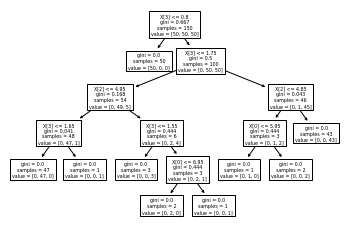

In [3]:
#printing using sklearn, since I am having some trouble with dtreeviz

from sklearn.datasets import load_iris
from sklearn import tree
X_train, Y_train = load_iris(return_X_y=True)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
tree.plot_tree(clf)

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Your code here! :)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf_forest = RandomForestClassifier(n_estimators=100)
clf_forest = clf_forest.fit(X_train, Y_train)

#I perform some predictions
Y_test_pred = clf_forest.predict(X_test)
Y_train_pred = clf_forest.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Accuracy on train set:",metrics.accuracy_score(Y_train, Y_train_pred))

model_comparison["RandomForestClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


Accuracy on test set: 0.75
Accuracy on train set: 1.0


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 1 (0.096813)
2. feature 4 (0.087681)
3. feature 0 (0.080379)
4. feature 12 (0.068215)
5. feature 2 (0.035472)
6. feature 9 (0.032808)
7. feature 3 (0.030227)
8. feature 29 (0.022839)
9. feature 18 (0.020462)
10. feature 17 (0.020015)
11. feature 47 (0.017368)
12. feature 7 (0.016756)
13. feature 10 (0.016362)
14. feature 41 (0.016348)
15. feature 21 (0.015939)
16. feature 5 (0.015938)
17. feature 33 (0.015346)
18. feature 55 (0.014700)
19. feature 50 (0.014302)
20. feature 53 (0.014140)
21. feature 59 (0.014116)
22. feature 15 (0.013898)
23. feature 35 (0.013833)
24. feature 37 (0.013313)
25. feature 48 (0.013222)
26. feature 49 (0.013178)
27. feature 40 (0.013076)
28. feature 20 (0.012419)
29. feature 60 (0.012193)
30. feature 58 (0.011218)
31. feature 34 (0.011079)
32. feature 6 (0.010908)
33. feature 30 (0.010516)
34. feature 44 (0.010386)
35. feature 51 (0.010371)
36. feature 14 (0.010315)
37. feature 39 (0.010297)
38. feature 36 (0.010253)
39. feature 3

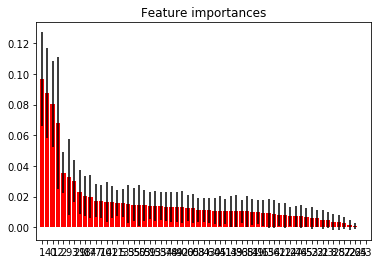

In [6]:
# Your code here
import matplotlib.pyplot as plt


importances = clf_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [ ]:
# Your code here!

X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# test pdpbox
import pdpbox
from pdpbox import pdp 
pdp_duration_amount = pdp.pdp_interact(clf_forest,model_features=df[list(X.columns)],['Duration','Amount'])
pdp.pdp_interact_plot(pdp_duration_amount, ['Duration','Amount'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

In [7]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Accuracy on train set:",metrics.accuracy_score(Y_train, Y_train_pred))

model_comparison["XGBClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


Accuracy on test set: 0.7366666666666667
Accuracy on train set: 0.9128571428571428


In [8]:
import catboost as ctb
import lightgbm as lgbm

model = ctb.CatBoostClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Accuracy on train set:",metrics.accuracy_score(Y_train, Y_train_pred))

model_comparison["CatBoostClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


Learning rate set to 0.008847
0:	learn: 0.6889629	total: 94.6ms	remaining: 1m 34s
1:	learn: 0.6852062	total: 108ms	remaining: 53.8s
2:	learn: 0.6812953	total: 118ms	remaining: 39.4s
3:	learn: 0.6776186	total: 128ms	remaining: 31.9s
4:	learn: 0.6739403	total: 137ms	remaining: 27.3s
5:	learn: 0.6704006	total: 147ms	remaining: 24.3s
6:	learn: 0.6671268	total: 156ms	remaining: 22.1s
7:	learn: 0.6640868	total: 165ms	remaining: 20.4s
8:	learn: 0.6610292	total: 176ms	remaining: 19.4s
9:	learn: 0.6579855	total: 185ms	remaining: 18.4s
10:	learn: 0.6549191	total: 195ms	remaining: 17.5s
11:	learn: 0.6518129	total: 205ms	remaining: 16.9s
12:	learn: 0.6480220	total: 216ms	remaining: 16.4s
13:	learn: 0.6450894	total: 225ms	remaining: 15.9s
14:	learn: 0.6417599	total: 234ms	remaining: 15.4s
15:	learn: 0.6382357	total: 243ms	remaining: 14.9s
16:	learn: 0.6352420	total: 255ms	remaining: 14.7s
17:	learn: 0.6330813	total: 264ms	remaining: 14.4s
18:	learn: 0.6299043	total: 273ms	remaining: 14.1s
19:	learn

178:	learn: 0.4310103	total: 1.55s	remaining: 7.1s
179:	learn: 0.4302893	total: 1.55s	remaining: 7.08s
180:	learn: 0.4297895	total: 1.56s	remaining: 7.06s
181:	learn: 0.4292033	total: 1.57s	remaining: 7.04s
182:	learn: 0.4286799	total: 1.57s	remaining: 7.03s
183:	learn: 0.4279333	total: 1.58s	remaining: 7.01s
184:	learn: 0.4270866	total: 1.59s	remaining: 6.99s
185:	learn: 0.4266448	total: 1.59s	remaining: 6.97s
186:	learn: 0.4262332	total: 1.6s	remaining: 6.96s
187:	learn: 0.4257177	total: 1.6s	remaining: 6.93s
188:	learn: 0.4252225	total: 1.61s	remaining: 6.92s
189:	learn: 0.4246428	total: 1.62s	remaining: 6.9s
190:	learn: 0.4238696	total: 1.62s	remaining: 6.88s
191:	learn: 0.4231506	total: 1.63s	remaining: 6.86s
192:	learn: 0.4224527	total: 1.64s	remaining: 6.84s
193:	learn: 0.4220295	total: 1.64s	remaining: 6.82s
194:	learn: 0.4215940	total: 1.65s	remaining: 6.81s
195:	learn: 0.4210046	total: 1.65s	remaining: 6.79s
196:	learn: 0.4204675	total: 1.67s	remaining: 6.79s
197:	learn: 0.41

347:	learn: 0.3486858	total: 2.73s	remaining: 5.11s
348:	learn: 0.3483856	total: 2.73s	remaining: 5.09s
349:	learn: 0.3478912	total: 2.74s	remaining: 5.08s
350:	learn: 0.3473650	total: 2.74s	remaining: 5.07s
351:	learn: 0.3469844	total: 2.75s	remaining: 5.06s
352:	learn: 0.3465496	total: 2.75s	remaining: 5.05s
353:	learn: 0.3461527	total: 2.76s	remaining: 5.04s
354:	learn: 0.3454796	total: 2.77s	remaining: 5.03s
355:	learn: 0.3451319	total: 2.77s	remaining: 5.02s
356:	learn: 0.3447399	total: 2.78s	remaining: 5.01s
357:	learn: 0.3444693	total: 2.79s	remaining: 5s
358:	learn: 0.3440469	total: 2.79s	remaining: 4.99s
359:	learn: 0.3437863	total: 2.8s	remaining: 4.98s
360:	learn: 0.3434347	total: 2.81s	remaining: 4.97s
361:	learn: 0.3430512	total: 2.81s	remaining: 4.96s
362:	learn: 0.3427968	total: 2.82s	remaining: 4.95s
363:	learn: 0.3423567	total: 2.82s	remaining: 4.93s
364:	learn: 0.3419598	total: 2.83s	remaining: 4.92s
365:	learn: 0.3415883	total: 2.84s	remaining: 4.91s
366:	learn: 0.34

534:	learn: 0.2874667	total: 3.89s	remaining: 3.38s
535:	learn: 0.2872326	total: 3.9s	remaining: 3.37s
536:	learn: 0.2869690	total: 3.9s	remaining: 3.37s
537:	learn: 0.2867281	total: 3.91s	remaining: 3.36s
538:	learn: 0.2865119	total: 3.91s	remaining: 3.35s
539:	learn: 0.2863489	total: 3.92s	remaining: 3.34s
540:	learn: 0.2860540	total: 3.93s	remaining: 3.33s
541:	learn: 0.2857966	total: 3.93s	remaining: 3.32s
542:	learn: 0.2856912	total: 3.94s	remaining: 3.31s
543:	learn: 0.2854222	total: 3.94s	remaining: 3.3s
544:	learn: 0.2852639	total: 3.95s	remaining: 3.3s
545:	learn: 0.2850681	total: 3.95s	remaining: 3.29s
546:	learn: 0.2848343	total: 3.96s	remaining: 3.28s
547:	learn: 0.2844566	total: 3.96s	remaining: 3.27s
548:	learn: 0.2842984	total: 3.97s	remaining: 3.26s
549:	learn: 0.2839156	total: 3.98s	remaining: 3.25s
550:	learn: 0.2836834	total: 3.98s	remaining: 3.24s
551:	learn: 0.2834865	total: 3.98s	remaining: 3.23s
552:	learn: 0.2831432	total: 3.99s	remaining: 3.23s
553:	learn: 0.28

720:	learn: 0.2394650	total: 4.89s	remaining: 1.89s
721:	learn: 0.2391080	total: 4.9s	remaining: 1.89s
722:	learn: 0.2388779	total: 4.91s	remaining: 1.88s
723:	learn: 0.2387459	total: 4.91s	remaining: 1.87s
724:	learn: 0.2384839	total: 4.92s	remaining: 1.86s
725:	learn: 0.2381987	total: 4.92s	remaining: 1.86s
726:	learn: 0.2379923	total: 4.93s	remaining: 1.85s
727:	learn: 0.2377774	total: 4.94s	remaining: 1.84s
728:	learn: 0.2375038	total: 4.94s	remaining: 1.84s
729:	learn: 0.2373546	total: 4.95s	remaining: 1.83s
730:	learn: 0.2370583	total: 4.95s	remaining: 1.82s
731:	learn: 0.2369212	total: 4.96s	remaining: 1.81s
732:	learn: 0.2366424	total: 4.96s	remaining: 1.81s
733:	learn: 0.2364444	total: 4.97s	remaining: 1.8s
734:	learn: 0.2361805	total: 4.97s	remaining: 1.79s
735:	learn: 0.2359045	total: 4.98s	remaining: 1.79s
736:	learn: 0.2356847	total: 4.99s	remaining: 1.78s
737:	learn: 0.2354789	total: 4.99s	remaining: 1.77s
738:	learn: 0.2352359	total: 5s	remaining: 1.76s
739:	learn: 0.235

884:	learn: 0.2039431	total: 5.73s	remaining: 744ms
885:	learn: 0.2037024	total: 5.73s	remaining: 738ms
886:	learn: 0.2035138	total: 5.74s	remaining: 731ms
887:	learn: 0.2033615	total: 5.74s	remaining: 725ms
888:	learn: 0.2031578	total: 5.75s	remaining: 718ms
889:	learn: 0.2029530	total: 5.76s	remaining: 712ms
890:	learn: 0.2027500	total: 5.76s	remaining: 705ms
891:	learn: 0.2025268	total: 5.77s	remaining: 698ms
892:	learn: 0.2023151	total: 5.77s	remaining: 692ms
893:	learn: 0.2021571	total: 5.78s	remaining: 685ms
894:	learn: 0.2019486	total: 5.79s	remaining: 679ms
895:	learn: 0.2015925	total: 5.79s	remaining: 672ms
896:	learn: 0.2013593	total: 5.79s	remaining: 665ms
897:	learn: 0.2011007	total: 5.8s	remaining: 659ms
898:	learn: 0.2009046	total: 5.81s	remaining: 652ms
899:	learn: 0.2007130	total: 5.81s	remaining: 646ms
900:	learn: 0.2005557	total: 5.82s	remaining: 639ms
901:	learn: 0.2002388	total: 5.82s	remaining: 633ms
902:	learn: 0.2000722	total: 5.83s	remaining: 626ms
903:	learn: 0

In [9]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier()
model.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Accuracy on train set:",metrics.accuracy_score(Y_train, Y_train_pred))

model_comparison["LGBMClassifier"] = metrics.accuracy_score(Y_test, Y_test_pred)


Accuracy on test set: 0.7466666666666667
Accuracy on train set: 1.0


The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [10]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison,orient='index')
model_comparison_df.columns = ['accuracy on testing set']
model_comparison_df.head()

,accuracy on testing set
DecisionTreeClassifier,0.683333
RandomForestClassifier,0.750000
XGBClassifier,0.736667
CatBoostClassifier,0.750000
LGBMClassifier,0.746667
